In [ ]:
### First install the proper libraries
Run the script to see the Bollinger Bands plot and analysis for XRP ###

In [2]:
! pip install yfinance pandas pandas_ta matplotlib

     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/115.1 kB ? eta -:--:--
     ------ ------------------------------ 20.5/115.1 kB 217.9 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/115.1 kB 330.3 kB/s eta 0:00:01
     -----------------------------------  112.6/115.1 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 115.1/115.1 kB 560.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=de2b1aa095d6d209e1bb1133c5982963715a5138372db07e075c6fcdaf9b6b43
  Stored in directory: c:\users\hanss\appdata\local\pip\cache\wheels\7f\33\8b\50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


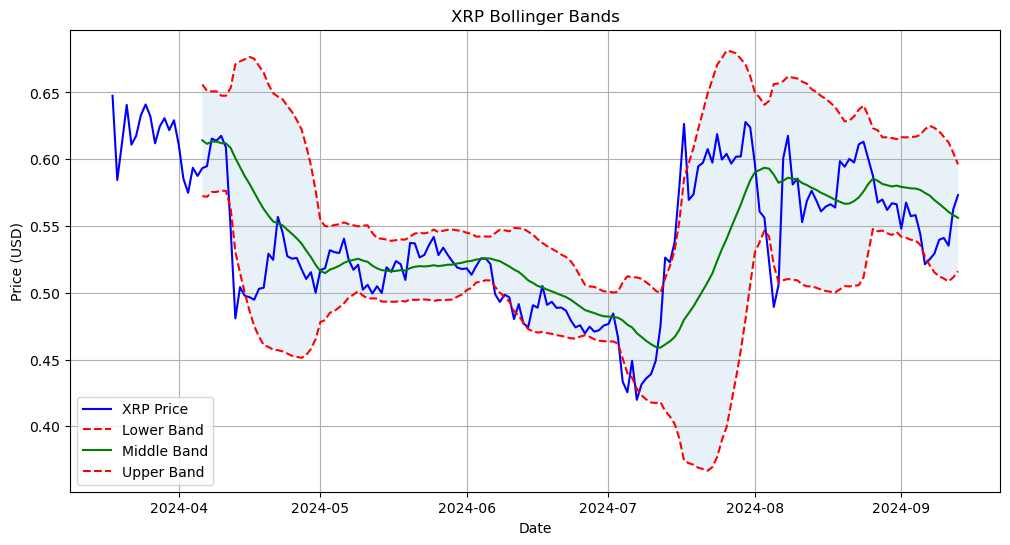

Current XRP Price: $0.5731
Upper Bollinger Band: $0.5962
Middle Bollinger Band: $0.5562
Lower Bollinger Band: $0.5162
XRP is currently trading within the Bollinger Bands.
Bollinger Bandwidth: 0.1439


In [3]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_xrp_data(start_date, end_date):
    xrp = yf.Ticker("XRP-USD")
    data = xrp.history(start=start_date, end=end_date)
    return data

def calculate_bollinger_bands(data, window=20, num_std=2):
    bb_indicator = ta.bbands(data['Close'], length=window, std=num_std)
    data = pd.concat([data, bb_indicator], axis=1)
    return data

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='XRP Price', color='blue')
    plt.plot(data.index, data['BBL_20_2.0'], label='Lower Band', color='red', linestyle='--')
    plt.plot(data.index, data['BBM_20_2.0'], label='Middle Band', color='green', linestyle='-')
    plt.plot(data.index, data['BBU_20_2.0'], label='Upper Band', color='red', linestyle='--')
    plt.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
    plt.title('XRP Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_bollinger_bands(data):
    current_price = data['Close'].iloc[-1]
    upper_band = data['BBU_20_2.0'].iloc[-1]
    lower_band = data['BBL_20_2.0'].iloc[-1]
    middle_band = data['BBM_20_2.0'].iloc[-1]

    print(f"Current XRP Price: ${current_price:.4f}")
    print(f"Upper Bollinger Band: ${upper_band:.4f}")
    print(f"Middle Bollinger Band: ${middle_band:.4f}")
    print(f"Lower Bollinger Band: ${lower_band:.4f}")

    if current_price > upper_band:
        print("XRP is currently trading above the upper Bollinger Band, indicating potential overbought conditions.")
    elif current_price < lower_band:
        print("XRP is currently trading below the lower Bollinger Band, indicating potential oversold conditions.")
    else:
        print("XRP is currently trading within the Bollinger Bands.")

    bandwidth = (upper_band - lower_band) / middle_band
    print(f"Bollinger Bandwidth: {bandwidth:.4f}")

    if bandwidth < 0.1:
        print("Bollinger Bands are squeezing, indicating potential for a breakout.")
    elif bandwidth > 0.3:
        print("Bollinger Bands are wide, indicating high volatility.")

def main():
    end_date = datetime.now()
    start_date = end_date - timedelta(days=180)  # Fetch 6 months of data

    xrp_data = fetch_xrp_data(start_date, end_date)
    xrp_data_with_bb = calculate_bollinger_bands(xrp_data)

    plot_bollinger_bands(xrp_data_with_bb)
    analyze_bollinger_bands(xrp_data_with_bb)

if __name__ == "__main__":
    main()

In [10]:
### This implementation provides a comprehensive view of XRP's Bollinger Bands, 
# including visual representation and analytical insights, which can be valuable for technical analysis and trading decisions. ###

In [ ]:
### This code does the following:
1. Imports necessary libraries: yfinance for fetching data, pandas_ta for technical analysis, and matplotlib for plotting.
2. Defines a function fetch_xrp_data() to retrieve XRP price data for the last 6 months using yfinance.
3. Implements calculate_bollinger_bands() using pandas_ta to compute Bollinger Bands with a 20-day window and 2 standard deviations.
4. Creates plot_bollinger_bands() to visualize the XRP price along with the Bollinger Bands.
5. Includes analyze_bollinger_bands() to provide insights on the current price position relative to the bands, bandwidth analysis, and potential trading signals.
6. The main() function orchestrates the entire process, fetching data, calculating Bollinger Bands, plotting, and analyzing.###